In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image

from model.vq_vae import VectorQuantize, ResBlock

In [8]:
import intel_extension_for_pytorch as ipex

In [14]:
dataset = MNIST(root='data', train=False, transform=ToTensor())

In [24]:
model = VectorQuantize(28, 28, in_chan=1, d_embedding=128, patch_size=4, vocab_size=128, beta=0.15)
model = torch.load('vq-best.safetensors', weights_only=False, map_location='xpu')
model.eval()

VectorQuantize(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(2, 2))
    (1): ResBlock(
      (block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): Conv2d(32, 64, kernel_size=(2, 2), stride=(2, 2))
    (3): ResBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU()
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
   

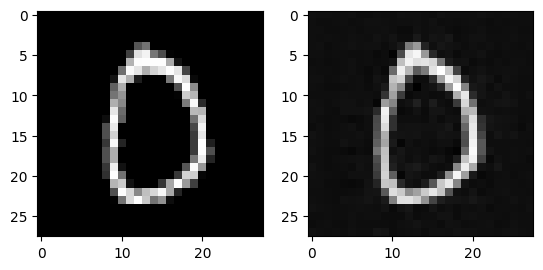

In [27]:

img, label = dataset[567]
encoding_indices, quantized, recons, loss = model(img.unsqueeze(0).to('xpu'))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(to_pil_image(img), cmap='gray')
ax[1].imshow(recons[0][0].detach().cpu().numpy(), cmap='gray')